<a href="https://colab.research.google.com/github/MKeel1ng/DailyMailAnalysis/blob/master/DailyMail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing the necessary packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import tqdm

In [5]:
path='/content/drive/MyDrive/DailyMail/'

# Data Scraping

## get all urls

In [ ]:
def get_all_links(url):
  response = requests.get(url) 
  soup = BeautifulSoup(response.text, 'html.parser') 
  all_a=soup.findAll('a')

  return all_a

def get_news_links(url):
  response = requests.get(url) 
  soup = BeautifulSoup(response.text, 'html.parser') 
  all_a=soup.find('ul',class_='archive-articles debate link-box').findAll('a')
  return all_a

def clean_links(contains,all_a):
  list_of_links=[]
  for i in range(len(all_a)):
    try:
      
      href=all_a[i]['href']

      if contains in href:
          list_of_links.append(href)
    except:
      continue
  return list_of_links

In [ ]:
url_2021='https://www.dailymail.co.uk/home/sitemaparchive/year_2021.html'

links2021=get_all_links(url_2021)
days2021=clean_links('/day_',links2021)



In [ ]:
news_[0]

<a href="/wires/ap/article-9436061/Barkov-Driedger-lead-Panthers-3-0-win-Blue-Jackets.html" title="">Barkov, Driedger lead Panthers to 3-0 win over Blue Jackets</a>

In [ ]:
df=pd.DataFrame(columns=['date','type','link','title'])
id=0
for i,day in tqdm.tqdm(enumerate(days2021)):
  url='https://www.dailymail.co.uk'+day

  date=day.split('/')[-1].split('_')[-1].split('.')[0]

  news_=get_news_links(url) 
  for i in range(len(news_)):
    link=news_[i]['href']
    title=news_[i].get_text()
    articleType=link.split('/')[1]
    
  
    df_dict={'date':date,'type':articleType,'link':link,'title':title}
    id+=1
    row_df=pd.DataFrame(df_dict,index=[id])
    df=df.append(row_df,ignore_index=True)






0it [00:00, ?it/s]

1it [00:04,  4.23s/it]

2it [00:07,  3.92s/it]

3it [00:10,  3.56s/it]

4it [00:13,  3.37s/it]

5it [00:16,  3.38s/it]

6it [00:22,  4.09s/it]

7it [00:27,  4.34s/it]

8it [00:34,  5.12s/it]

9it [00:39,  5.11s/it]

10it [00:42,  4.53s/it]

11it [00:45,  4.18s/it]

12it [00:49,  4.10s/it]

13it [00:56,  4.83s/it]

14it [01:02,  5.41s/it]

15it [01:09,  5.91s/it]

16it [01:17,  6.40s/it]

17it [01:25,  6.94s/it]

18it [01:30,  6.43s/it]

19it [01:35,  5.98s/it]

20it [01:45,  6.93s/it]

21it [01:54,  7.81s/it]

22it [02:05,  8.51s/it]

23it [02:15,  9.14s/it]

24it [02:27, 10.00s/it]

25it [02:34,  8.91s/it]

26it [02:40,  8.31s/it]

27it [02:52,  9.28s/it]

28it [03:04, 10.19s/it]

29it [03:17, 10.80s/it]

30it [03:30, 11.59s/it]

31it [03:43, 12.11s/it]

32it [03:51, 10.70s/it]

33it [03:59, 10.03s/it]

34it [04:14, 11.45s/it]

35it [04:30, 12.89s/it]

36it [04:45, 13.60s/it]

37it [05:01, 14.34s/it]

38it [05:17, 14.70s/it]

39it [05:25, 12.78s/it]

40it [05:34,

In [ ]:
df2=df.drop_duplicates().copy()

In [ ]:
df2

,date,type,link,title
0,20210401,news,/news/article-9429149/Watchdog-calls-ramblers-...,Minorities 'don't feel welcome in the countrys...
1,20210401,wires,/wires/ap/article-9429151/UN-condemns-violence...,UN condemns violence against Myanmar protester...
2,20210401,tvshowbiz,/tvshowbiz/article-9429147/Jeannie-Mai-ties-kn...,Jeannie Mai ties the knot with rapper Jeezy du...
3,20210401,wires,/wires/reuters/article-9429145/Baseball-No-bre...,Baseball-No breaks from COVID-19 as MLB returns
4,20210401,news,/news/article-9429143/Nurse-pay-app-goes-bust-...,Nurse pay app goes bust after finance company ...
...,...,...,...,...
170736,20210131,wires,/wires/ap/article-9205933/Sentencing-delayed-f...,Sentencing delayed for fired VA staffer who ki...
170737,20210131,wires,/wires/ap/article-9205931/Watson-scores-22-lif...,Watson scores 22 to lift Dayton over Rhode Isl...
170738,20210131,wires,/wires/ap/article-9205929/Cubs-agree-1-yr-deal...,Cubs agree to 1-yr deal with RHP Trevor Williams
170739,20210131,tvshowbiz,/tvshowbiz/article-9205927/The-Bold-Type-retur...,The Bold Type will return for a fifth and FINA...


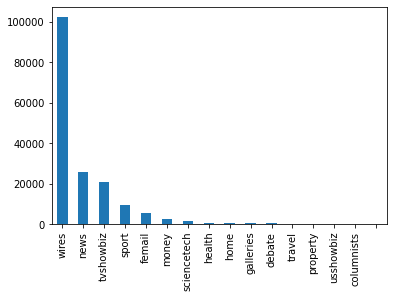

In [ ]:
df2['type'].value_counts().plot.bar()

In [ ]:
df.to_csv('DailyMail2021.csv')

# Topic Modelling

In [6]:
df=pd.read_csv(path+'DailyMail2021.csv')

In [7]:
df=df[df['type']=='news']

In [8]:
df=df.reset_index()

In [9]:
df[df['Unnamed: 0']==170067]

,index,Unnamed: 0,date,type,link,title
25831,170067,170067,20210131,news,/news/article-9207293/BidenLied-trends-Twitter...,#BidenLied trends on Twitter as critics demand...


In [10]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [11]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

stemmer = SnowballStemmer('english')

In [12]:
doc_sample = df.iloc[0].title
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Minorities', "'don't", 'feel', 'welcome', 'in', 'the', "countryside':", 'Watchdog', 'calls', 'on', 'ramblers', 'to', 'be', 'friendly', 'towards', 'strangers', 'during', 'green', 'belt', 'visits']


 tokenized and lemmatized document: 
['minor', 'feel', 'welcom', 'countrysid', 'watchdog', 'call', 'rambler', 'friend', 'stranger', 'green', 'belt', 'visit']


In [13]:
df.iloc[4310].title

"Why wearing two face coverings may be pointless: Double-masking 'is only slightly better at stopping the spread of Covid particles than relying on one'"

In [15]:
processed_docs = df['title'].map(preprocess)
processed_docs[:10]

0    [minor, feel, welcom, countrysid, watchdog, ca...
1    [nurs, go, bust, financ, compani, david, camer...
2    [factori, growth, hit, year, high, britain, co...
3    [seven, british, peopl, die, brain, blood, clo...
4    [fight, break, walmart, custom, take, drunken,...
5    [fear, tank, prospect, young, peopl, face, emp...
6    [furious, tori, urg, demand, refund, million, ...
7    [australian, doctor, describ, shock, advers, i...
8    [scienc, support, puberti, blocker, children, ...
9    [lazi, lawn, garden, expert, let, wild, brown,...
Name: title, dtype: object

In [16]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 belt
1 call
2 countrysid
3 feel
4 friend
5 green
6 minor
7 rambler
8 stranger
9 visit
10 watchdog


In [17]:
dictionary.filter_extremes(no_below=15, no_above=0.85, keep_n=100000)

In [18]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(36, 1),
 (55, 1),
 (273, 1),
 (347, 1),
 (355, 1),
 (399, 1),
 (783, 1),
 (1383, 1),
 (2460, 1)]

In [ ]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 36 ("covid") appears 1 time.
Word 55 ("face") appears 1 time.
Word 273 ("mask") appears 1 time.
Word 347 ("doubl") appears 1 time.
Word 355 ("stop") appears 1 time.
Word 399 ("cover") appears 1 time.
Word 783 ("wear") appears 1 time.
Word 1383 ("spread") appears 1 time.
Word 2460 ("better") appears 1 time.


In [19]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.38559002770394213),
 (1, 0.1803917278193779),
 (2, 0.3883493787743854),
 (3, 0.2929128481162207),
 (4, 0.22004431687340506),
 (5, 0.2590964984748521),
 (6, 0.3046773543344673),
 (7, 0.33629766225884233),
 (8, 0.2583334282096987),
 (9, 0.3137729087897606),
 (10, 0.3090331297246574)]


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import LdaModel, CoherenceModel
from gensim import corpora

In [ ]:
dirichlet_dict = dictionary


# Considering 1-15 topics, as the last is cut off
num_topics = list(range(25)[1:])
num_keywords = 15

LDA_models = {}
LDA_topics = {}
for i in num_topics:
    print(i)
    LDA_models[i] =gensim.models.LdaMulticore(bow_corpus, num_topics=i, id2word=dirichlet_dict, passes=10, workers=8)

    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

In [ ]:
LDA_stability = {}
for i in range(0, len(num_topics)-1):
    jaccard_sims = []
    for t1, topic1 in enumerate(LDA_topics[num_topics[i]]): # pylint: disable=unused-variable
        sims = []
        for t2, topic2 in enumerate(LDA_topics[num_topics[i+1]]): # pylint: disable=unused-variable
            sims.append(jaccard_similarity(topic1, topic2))    
        
        jaccard_sims.append(sims)    
    
    LDA_stability[num_topics[i]] = jaccard_sims
                
mean_stabilities = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]

In [ ]:
coherences = [CoherenceModel(model=LDA_models[i], texts=processed_docs, dictionary=dirichlet_dict, coherence='c_v').get_coherence() for i in num_topics[:-1]]

In [ ]:
coh_sta_diffs = [coherences[i] - mean_stabilities[i] for i in range(num_keywords)[:-2]] # limit topic numbers to the number of keywords
coh_sta_max = max(coh_sta_diffs)
coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
ideal_topic_num = num_topics[ideal_topic_num_index]

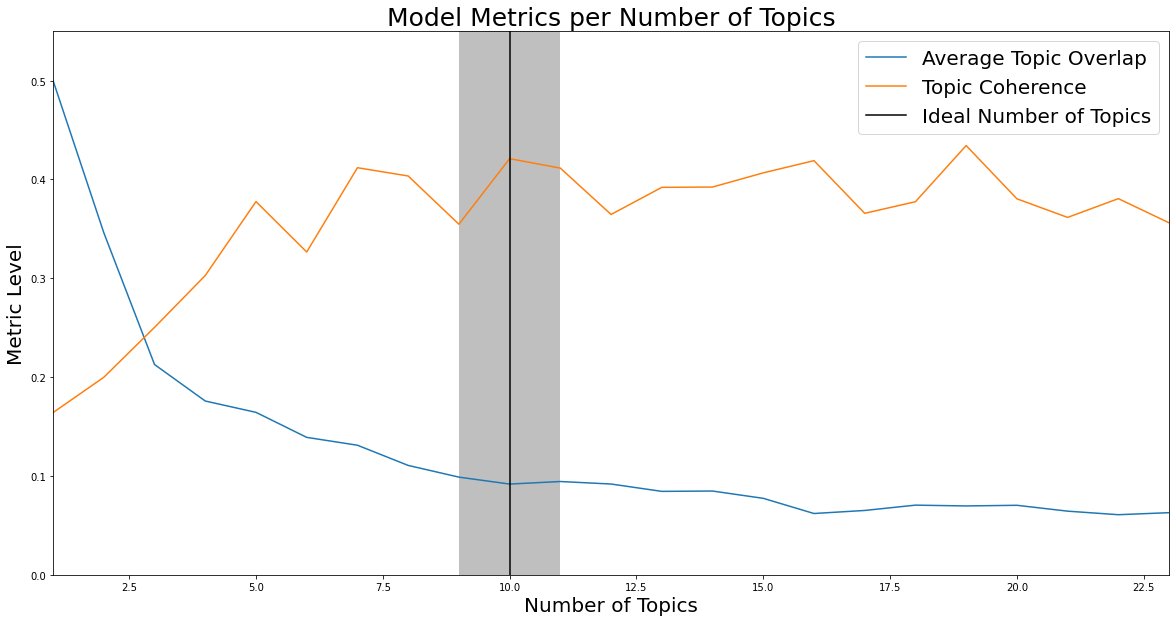

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities, label='Average Topic Overlap')
ax = sns.lineplot(x=num_topics[:-1], y=coherences, label='Topic Coherence')

ax.axvline(x=ideal_topic_num, label='Ideal Number of Topics', color='black')
ax.axvspan(xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

y_max = max(max(mean_stabilities), max(coherences)) + (0.10 * max(max(mean_stabilities), max(coherences)))
ax.set_ylim([0, y_max])
ax.set_xlim([1, num_topics[-1]-1])
                
ax.axes.set_title('Model Metrics per Number of Topics', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=20)
ax.set_xlabel('Number of Topics', fontsize=20)
plt.legend(fontsize=20)
plt.show()   

Ideal number of topics is 10

In [21]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=25, workers=2)

In [22]:
lda_model.save(path+'BestLDA')

In [23]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.059*"covid" + 0.037*"vaccin" + 0.013*"bori" + 0.012*"say" + 0.012*"warn" + 0.011*"johnson" + 0.011*"peopl" + 0.011*"lockdown" + 0.011*"week" + 0.010*"death"
Topic: 1 
Words: 0.024*"school" + 0.022*"year" + 0.021*"home" + 0.020*"million" + 0.012*"star" + 0.010*"famili" + 0.010*"children" + 0.009*"teacher" + 0.008*"open" + 0.008*"reveal"
Topic: 2 
Words: 0.032*"year" + 0.017*"jail" + 0.017*"murder" + 0.015*"death" + 0.014*"mother" + 0.013*"die" + 0.013*"kill" + 0.013*"charg" + 0.011*"woman" + 0.010*"father"
Topic: 3 
Words: 0.017*"australia" + 0.017*"covid" + 0.014*"travel" + 0.013*"lockdown" + 0.011*"hotel" + 0.011*"quarantin" + 0.009*"australian" + 0.009*"coronavirus" + 0.008*"million" + 0.008*"year"
Topic: 4 
Words: 0.018*"miss" + 0.010*"snow" + 0.010*"water" + 0.010*"bodi" + 0.009*"home" + 0.009*"day" + 0.009*"near" + 0.008*"flood" + 0.008*"storm" + 0.008*"year"
Topic: 5 
Words: 0.022*"say" + 0.016*"claim" + 0.010*"harri" + 0.009*"princ" + 0.009*"accus" + 0.009*"ca

In [24]:
processed_docs[6]

['furious',
 'tori',
 'urg',
 'demand',
 'refund',
 'million',
 'invest',
 'dutch',
 'vaccin',
 'factori',
 'astrazeneca',
 'jab',
 'impos',
 'export']

In [ ]:
df.head(10)

,index,Unnamed: 0,date,type,link,title
0,0,0,20210401,news,/news/article-9429149/Watchdog-calls-ramblers-...,Minorities 'don't feel welcome in the countrys...
1,4,4,20210401,news,/news/article-9429143/Nurse-pay-app-goes-bust-...,Nurse pay app goes bust after finance company ...
2,10,10,20210401,news,/news/article-9429131/Britain-comes-roaring-pa...,Factory growth hits ten-year high: Britain com...
3,14,14,20210401,news,/news/article-9429125/UK-regulator-total-30-ca...,Seven British people died from a brain blood c...
4,22,22,20210401,news,/news/article-9429107/Drunken-Walmart-shoplift...,Fight breaks out in Walmart when customer take...
5,26,26,20210401,news,/news/article-9429099/Fear-tanking-job-prospec...,Fear of tanking job prospects for under 25s: Y...
6,28,28,20210401,news,/news/article-9429095/UK-taxpayers-pumped-21m-...,Furious Tory MP urges No10 to demand refund of...
7,36,36,20210401,news,/news/article-9429079/ER-doctor-opens-adverse-...,Australian ER doctor describes the 'shocking'...
8,37,37,20210401,news,/news/article-9429077/Science-supports-use-pub...,Science that supports use of puberty blockers ...
9,45,45,20210401,news,/news/article-9429059/Garden-experts-say-letti...,Make yours a lazy lawn: Garden experts say let...


In [25]:
for index, score in sorted(lda_model[bow_corpus[6]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6957973837852478	 
Topic: 0.059*"covid" + 0.037*"vaccin" + 0.013*"bori" + 0.012*"say" + 0.012*"warn" + 0.011*"johnson" + 0.011*"peopl" + 0.011*"lockdown" + 0.011*"week" + 0.010*"death"

Score: 0.1694924384355545	 
Topic: 0.017*"australia" + 0.017*"covid" + 0.014*"travel" + 0.013*"lockdown" + 0.011*"hotel" + 0.011*"quarantin" + 0.009*"australian" + 0.009*"coronavirus" + 0.008*"million" + 0.008*"year"

Score: 0.08803815394639969	 
Topic: 0.010*"attack" + 0.010*"chines" + 0.009*"share" + 0.009*"secur" + 0.008*"citi" + 0.008*"fake" + 0.008*"china" + 0.007*"bomb" + 0.007*"trade" + 0.006*"gamestop"


# Sentiment Analysis

In [26]:
!pip3 install flair
import flair

     |████████████████████████████████| 286kB 6.1MB/s 
     |████████████████████████████████| 2.2MB 49.2MB/s 
     |████████████████████████████████| 983kB 42.8MB/s 
     |████████████████████████████████| 1.2MB 49.6MB/s 
     |████████████████████████████████| 776.8MB 15kB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 19.7MB 25.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 798kB 24.2MB/s 
     |████████████████████████████████| 3.3MB 45.9MB/s 
     |████████████████████████████████| 870kB 39.3MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-cp37-none-any.whl size=9693 sha256=5a814f9d9b5f1e78ec6ab8cff6832da32b59f0943bf326e66e65b088dee8c908
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Created wheel for segtok: filenam

In [27]:
dfsent=df

In [ ]:
# dfsent=dfsent.drop(['index','Unnamed: 0'],axis=1)
dfsent['Sentiment']=0
dfsent.head()


,index,Unnamed: 0,date,type,link,title,Sentiment
0,0,0,20210401,news,/news/article-9429149/Watchdog-calls-ramblers-...,Minorities 'don't feel welcome in the countrys...,0
1,4,4,20210401,news,/news/article-9429143/Nurse-pay-app-goes-bust-...,Nurse pay app goes bust after finance company ...,0
2,10,10,20210401,news,/news/article-9429131/Britain-comes-roaring-pa...,Factory growth hits ten-year high: Britain com...,0
3,14,14,20210401,news,/news/article-9429125/UK-regulator-total-30-ca...,Seven British people died from a brain blood c...,0
4,22,22,20210401,news,/news/article-9429107/Drunken-Walmart-shoplift...,Fight breaks out in Walmart when customer take...,0


In [31]:
svals=[]
# flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
for i in tqdm.tqdm(range(len(dfsent))):
  sentence=df.iloc[i].title
  s = flair.data.Sentence(sentence)
  flair_sentiment.predict(s)
  total_sentiment = s.labels
  svals.append(str(total_sentiment[0]).split(' ')[0])
  
  

100%|██████████| 25937/25937 [39:39<00:00, 10.90it/s]


In [30]:
svals

['NEGATIVE']

In [32]:
dfsent['Sentiment']=svals

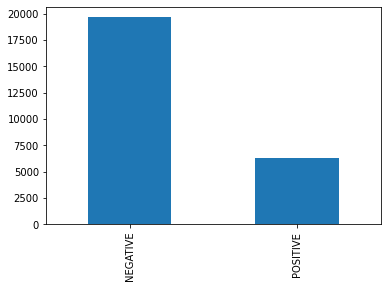

In [33]:
dfsent.Sentiment.value_counts().plot.bar()

In [34]:
dfsent.to_csv(path+'df_with_sent.csv')

# Add topics to df

In [51]:
dfsent[['Topic 0','Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9']]=0

In [56]:
dfsent=pd.read_csv(path+'df_with_sent.csv')
dfsent

,Unnamed: 0,index,Unnamed: 0.1,date,type,link,title,Sentiment
0,0,0,0,20210401,news,/news/article-9429149/Watchdog-calls-ramblers-...,Minorities 'don't feel welcome in the countrys...,NEGATIVE
1,1,4,4,20210401,news,/news/article-9429143/Nurse-pay-app-goes-bust-...,Nurse pay app goes bust after finance company ...,NEGATIVE
2,2,10,10,20210401,news,/news/article-9429131/Britain-comes-roaring-pa...,Factory growth hits ten-year high: Britain com...,POSITIVE
3,3,14,14,20210401,news,/news/article-9429125/UK-regulator-total-30-ca...,Seven British people died from a brain blood c...,NEGATIVE
4,4,22,22,20210401,news,/news/article-9429107/Drunken-Walmart-shoplift...,Fight breaks out in Walmart when customer take...,NEGATIVE
...,...,...,...,...,...,...,...,...
25932,25932,170706,170706,20210131,news,/news/article-9205993/Alleged-fraudster-Meliss...,Missing millionaire Melissa Caddick likely had...,NEGATIVE
25933,25933,170722,170722,20210131,news,/news/article-9205961/AFL-legend-Nathan-Buckle...,Has AFL legend Nathan Buckley found love with ...,NEGATIVE
25934,25934,170727,170727,20210131,news,/news/article-9205951/Hollywoods-super-rich-qu...,Hollywood's super rich are queue-jumping for C...,NEGATIVE
25935,25935,170735,170735,20210131,news,/news/article-9205935/Scott-Mitchell-says-disa...,Dame Barbara Windsor's husband Scott Mitchell ...,NEGATIVE


In [59]:
for i in tqdm.tqdm(range(len(dfsent))): 
  scores=lda_model[bow_corpus[i]]
  for score in scores:
    id=score[0]
    value=score[1]

    dfsent.loc[i,'Topic '+str(id)]=value


100%|██████████| 25937/25937 [00:51<00:00, 507.87it/s]


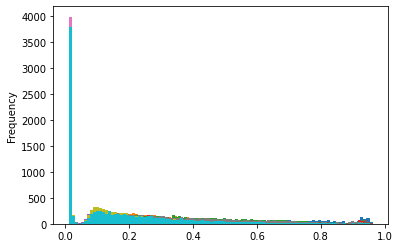

In [75]:
for i in range(10):
  dfsent['Topic ' +str(i)].plot.hist(bins=100)

In [80]:
# dfsent=dfsent.drop(['Unnamed: 0','index','Unnamed: 0.1'],axis=1)
dfsentTopics=dfsent[['Topic 0','Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9']]
dfsentTopics=dfsentTopics.mask(dfsentTopics < 0.05)

In [96]:
dfsent=dfsent.drop(['Topic 0','Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9'],axis=1)

In [100]:
dfsent_clean=pd.concat([dfsent,dfsentTopics],axis=1)

In [101]:
dfsent_clean

,date,type,link,title,Sentiment,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,20210401,news,/news/article-9429149/Watchdog-calls-ramblers-...,Minorities 'don't feel welcome in the countrys...,NEGATIVE,NaN,NaN,0.118629,NaN,NaN,0.476599,0.278927,0.100217,0.094249,NaN
1,20210401,news,/news/article-9429143/Nurse-pay-app-goes-bust-...,Nurse pay app goes bust after finance company ...,NEGATIVE,NaN,NaN,NaN,NaN,NaN,0.106767,0.820491,NaN,NaN,NaN
2,20210401,news,/news/article-9429131/Britain-comes-roaring-pa...,Factory growth hits ten-year high: Britain com...,POSITIVE,NaN,NaN,NaN,0.828950,NaN,NaN,NaN,NaN,0.109500,NaN
3,20210401,news,/news/article-9429125/UK-regulator-total-30-ca...,Seven British people died from a brain blood c...,NEGATIVE,0.774615,NaN,0.172045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210401,news,/news/article-9429107/Drunken-Walmart-shoplift...,Fight breaks out in Walmart when customer take...,NEGATIVE,NaN,NaN,NaN,0.473961,NaN,NaN,NaN,0.437137,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25932,20210131,news,/news/article-9205993/Alleged-fraudster-Meliss...,Missing millionaire Melissa Caddick likely had...,NEGATIVE,0.188333,0.398878,NaN,NaN,0.204628,0.170651,NaN,NaN,NaN,NaN
25933,20210131,news,/news/article-9205961/AFL-legend-Nathan-Buckle...,Has AFL legend Nathan Buckley found love with ...,NEGATIVE,NaN,0.802946,NaN,NaN,NaN,NaN,NaN,0.130380,NaN,NaN
25934,20210131,news,/news/article-9205951/Hollywoods-super-rich-qu...,Hollywood's super rich are queue-jumping for C...,NEGATIVE,0.675867,0.203062,0.084223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25935,20210131,news,/news/article-9205935/Scott-Mitchell-says-disa...,Dame Barbara Windsor's husband Scott Mitchell ...,NEGATIVE,0.240544,0.212082,0.144913,NaN,NaN,NaN,0.113737,0.066950,NaN,0.199547


In [102]:
dfsent_clean.to_csv('dfsent_clean.csv')

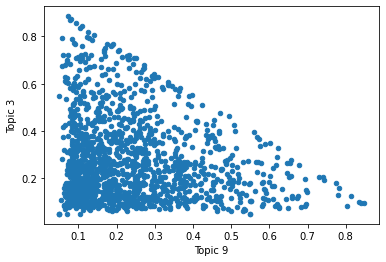

In [104]:
dfsent_clean.plot.scatter(x='Topic 9',y='Topic 3')

# Trends in time

In [122]:
dfsent_clean.date=pd.to_datetime(dfsent_clean.date,format='%Y%m%d')

In [132]:
dfsent_clean=dfsent_clean.sort_values(by='date')
dfsent_clean['Year-Month']=dfsent_clean.date.dt.to_period('M')

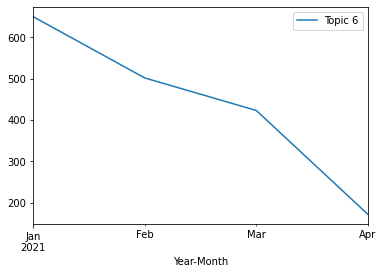

In [144]:
dfsent_clean[['Year-Month','Topic 6']].groupby('Year-Month').sum().plot()

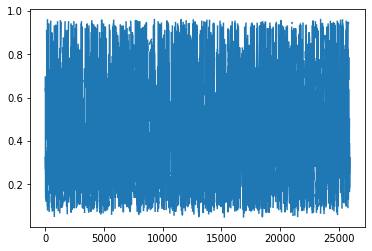

In [140]:
dfsent_clean['Topic 0'].plot()

# Sentiment of topics

In [109]:
df_topic_0=dfsent_clean[['title','Topic 0','Sentiment']]
df_topic_0=df_topic_0[~df_topic_0['Topic 0'].isna()].copy()

In [118]:
for i in range(10):
  topic='Topic '+str(i)
  df_topic=dfsent_clean[['title',topic,'Sentiment']]
  df_topic=df_topic[~df_topic[topic].isna()].copy() 

  lenall=len(df_topic)
  lenbad=len(df_topic[df_topic.Sentiment=='NEGATIVE'])
  percbad=np.round(lenbad/lenall*100)


  print('Topic {} had {}% Negative sentiment'.format(i,percbad))
  

Topic 0 had 79.0% Negative sentiment
Topic 1 had 70.0% Negative sentiment
Topic 2 had 78.0% Negative sentiment
Topic 3 had 73.0% Negative sentiment
Topic 4 had 71.0% Negative sentiment
Topic 5 had 77.0% Negative sentiment
Topic 6 had 82.0% Negative sentiment
Topic 7 had 74.0% Negative sentiment
Topic 8 had 78.0% Negative sentiment
Topic 9 had 77.0% Negative sentiment


In [119]:
lda_model.show_topics()

[(0,
  '0.059*"covid" + 0.037*"vaccin" + 0.013*"bori" + 0.012*"say" + 0.012*"warn" + 0.011*"johnson" + 0.011*"peopl" + 0.011*"lockdown" + 0.011*"week" + 0.010*"death"'),
 (1,
  '0.024*"school" + 0.022*"year" + 0.021*"home" + 0.020*"million" + 0.012*"star" + 0.010*"famili" + 0.010*"children" + 0.009*"teacher" + 0.008*"open" + 0.008*"reveal"'),
 (2,
  '0.032*"year" + 0.017*"jail" + 0.017*"murder" + 0.015*"death" + 0.014*"mother" + 0.013*"die" + 0.013*"kill" + 0.013*"charg" + 0.011*"woman" + 0.010*"father"'),
 (3,
  '0.017*"australia" + 0.017*"covid" + 0.014*"travel" + 0.013*"lockdown" + 0.011*"hotel" + 0.011*"quarantin" + 0.009*"australian" + 0.009*"coronavirus" + 0.008*"million" + 0.008*"year"'),
 (4,
  '0.018*"miss" + 0.010*"snow" + 0.010*"water" + 0.010*"bodi" + 0.009*"home" + 0.009*"day" + 0.009*"near" + 0.008*"flood" + 0.008*"storm" + 0.008*"year"'),
 (5,
  '0.022*"say" + 0.016*"claim" + 0.010*"harri" + 0.009*"princ" + 0.009*"accus" + 0.009*"call" + 0.008*"meghan" + 0.008*"royal" + 